<a href="https://colab.research.google.com/github/somelijer/CannonPhysics/blob/main/InstanceSegmentationORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the coco dataset

In [1]:
!pip install CocoDataset==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2023-06-23 12:04:49--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.64.156, 3.5.7.139, 3.5.28.226, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.64.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  45.3MB/s    in 5.7s    

2023-06-23 12:04:55 (42.0 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
from coco_dataset import coco_dataset_download as cocod
class_name='fork'
images_count=10
annotations_path='/content/annotations/instances_train2017.json'
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=16.56s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
finished images download


Making the annotations

In [17]:
import json
import os
import shutil

def create_fork_annotation_file(image_folder, annotation_file, output_folder, class_name, image_count):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Load the COCO annotation file
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Filter images that contain only the specified class
    filtered_images = [image for image in coco_data['images'] if image['file_name'] in os.listdir(image_folder)]
    filtered_image_ids = [image['id'] for image in filtered_images]

    #print(filtered_image_ids)

    # Filter annotations for the selected images

    filtered_annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] in filtered_image_ids and annotation['category_id'] == 48]
    for annotation in filtered_annotations:
        annotation['category_id'] = 1
    print("Filtrirana anotacija: ",filtered_annotations[0])

    # Update the image and annotation lists in the filtered COCO data
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    # Remove all other categories
    coco_data['categories'] = [{"id": 1, "name": class_name}]

    # Save the filtered annotation file
    output_annotation_file = os.path.join(output_folder, 'instances_fork.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(coco_data, f)

    # Copy the selected fork images to the output folder
    for image in filtered_images:
        image_path = os.path.join(image_folder, image['file_name'])
        shutil.copy(image_path, output_folder)

    print(f"Filtered annotation file saved at: {output_annotation_file}")
    print(f"Selected fork images copied to: {output_folder}")

# Set the necessary variables for creating the filtered annotation file
image_folder = '/content/fork'  # Replace with the path to the folder containing your fork images from the COCO dataset
annotation_file = '/content/annotations/instances_train2017.json'  # Replace with the path to the original COCO annotation file
output_folder = '/content/subsetAnnotations'  # Replace with the desired output folder path

# Create the filtered annotation file and copy the selected images to the output folder
create_fork_annotation_file(image_folder, annotation_file, output_folder, class_name, images_count)


Filtrirana anotacija:  {'segmentation': [[628.04, 293.43, 621.96, 293.98, 615.87, 297.3, 609.23, 297.86, 589.31, 283.47, 546.71, 256.92, 500.79, 233.68, 489.18, 229.81, 479.77, 230.36, 470.92, 232.02, 457.09, 232.02, 445.47, 227.59, 421.13, 212.1, 398.44, 189.97, 401.21, 189.97, 415.04, 201.04, 420.02, 206.02, 438.28, 218.74, 445.47, 223.17, 444.92, 218.19, 429.98, 208.78, 425.0, 204.91, 417.81, 200.49, 409.51, 192.19, 402.87, 185.55, 428.32, 204.36, 446.02, 216.53, 450.45, 216.53, 434.4, 206.57, 415.59, 192.74, 405.64, 182.78, 423.34, 194.95, 439.94, 204.91, 454.32, 213.76, 436.06, 198.83, 416.15, 185.55, 410.62, 179.46, 410.62, 176.7, 413.38, 175.04, 417.81, 175.59, 422.9, 181.19, 439.3, 192.43, 446.32, 195.24, 480.99, 213.05, 528.3, 237.87, 605.6, 272.07, 622.93, 277.22, 630.43, 288.0, 629.49, 292.21]], 'area': 3866.076049999998, 'iscrowd': 0, 'image_id': 90138, 'bbox': [398.44, 175.04, 231.99, 122.82], 'category_id': 1, 'id': 685447}
Filtered annotation file saved at: /content/subs

Test the data

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

COCO categories: 
fork



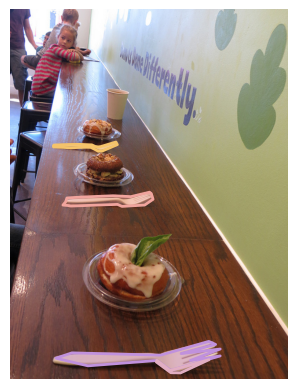

In [55]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

def load_random_photo_with_annotations(annotation_file, image_folder):
    # Load the COCO annotation file
    coco = COCO(annotation_file)

    # display COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

    # get all images containing given categories, select one at random
    catIds = coco.getCatIds(catNms=['fork']);
    imgIds = coco.getImgIds(catIds=catIds );
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

    # load and display image
    # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    # use url to load image
    I = io.imread(img['coco_url'])\

    # load and display instance annotations
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)



# Set the necessary variables
annotation_file = '/content/subsetAnnotations/instances_fork.json'  # Replace with the path to the filtered annotation file
image_folder = '/content/subsetAnnotations'  # Replace with the path to the folder containing the subset images

# Load a random photo with its annotations and segmentation masks
load_random_photo_with_annotations(annotation_file, image_folder)


# Create the model

In [6]:
import torch
import torchvision

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier head for the desired number of classes
num_classes = 2  # Including background and forks
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Replace the mask predictor for the desired number of classes
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# Print the modified model architecture
#print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 80.4MB/s]


In [ ]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Train the model

In [15]:
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor

def train(model, data_loader, optimizer, device):
    model.train()  # Set the model to training mode

    for images, targets in data_loader:
        images = list(image.to(device) for image in images)


        if isinstance(targets, list):
            # Targets are provided as a list
            pass  # No need to modify the targets
        elif isinstance(targets, torch.Tensor):
            # Targets are provided as a tensor
            targets = targets.to(device)
        else:
            raise TypeError("Unsupported target type. Expected list or torch.Tensor.")

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Compute the total loss
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        losses.backward()

        # Update the weights
        optimizer.step()




device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 2  # Including background and forks

dataset_root = '/content'  # Replace with the path to your dataset root folder
image_folder = dataset_root + '/subsetAnnotations'
annotation_file = dataset_root + '/subsetAnnotations/instances_fork.json'
train_dataset = CocoDetection(image_folder, annotation_file, transform=ToTensor())

# Set the batch size and other training parameters
batch_size = 4
num_workers = 2
shuffle = True


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [8]:
def custom_collate_fn(batch):
    images = []
    targets = []

    max_height = max([image.shape[1] for image, _ in batch])
    max_width = max([image.shape[2] for image, _ in batch])

    for image, target in batch:
        pad_height = max_height - image.shape[1]
        pad_width = max_width - image.shape[2]

        padded_image = torch.nn.functional.pad(image, (0, pad_width, 0, pad_height))

        images.append(padded_image)
        targets.append(target)
        print(target)

    return images, targets



In [16]:
# Create the data loader
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=custom_collate_fn)


# Set the optimizer and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Move the model to the device
model.to(device)

# Train for one epoch
train(model, train_data_loader, optimizer, device)

[{'segmentation': [[165.17, 256.51, 164.35, 217.68, 163.53, 217.48, 160.26, 254.47], [159.86, 255.69, 159.04, 217.68, 157.61, 216.86, 154.13, 255.49], [152.7, 252.42, 153.32, 217.48, 152.29, 217.48, 148.41, 253.85], [144.94, 254.06, 146.98, 216.86, 146.78, 216.86, 141.05, 255.49], [160.47, 266.93, 160.47, 271.63, 155.56, 277.15, 153.72, 273.47, 151.27, 271.63], [129.18, 395.13, 129.18, 405.09, 120.64, 427.15, 114.23, 425.73, 114.23, 412.92]], 'area': 707.0082499999987, 'iscrowd': 0, 'image_id': 548882, 'bbox': [114.23, 216.86, 50.94, 210.29], 'category_id': 48, 'id': 1520200}][{'segmentation': [[243.35, 389.17, 266.35, 392.88, 285.64, 395.85, 313.09, 401.04, 335.34, 390.65, 339.79, 397.33, 309.38, 407.72, 290.83, 403.27, 237.42, 391.4, 239.64, 388.43]], 'area': 577.3226999999988, 'iscrowd': 0, 'image_id': 516106, 'bbox': [237.42, 388.43, 102.37, 19.29], 'category_id': 48, 'id': 1517199}]
[{'segmentation': [[83.77, 142.51, 78.09, 143.19, 74.91, 149.09, 73.78, 154.32, 70.15, 159.31, 68.3

TypeError: ignored